The following data can be accessed in GA via the "Events" Tab. Methods for cleaning these data are almost the same.

1) Clicks on tools
2) Page Views
3) Session Duration


In [13]:
import pandas as pd # Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for Python
import json # JSON encoder and decoder for Python
import re
from functools import reduce
import numpy as np
from math import isnan
import matplotlib.pyplot as plt
import operator
import datetime
import seaborn as sns
from datetime import *

name = "Analytics Pilot View Session Duration and Page Views By ID 20220111-20220118"
pilot_file_loc = "C:/Users/huixin/OneDrive - UC San Diego/menoplan/trial_phase/"
path = pilot_file_loc + "ga_data/" + name
allD=pd.read_csv(pilot_file_loc + "cleaned_data/allDatajan.csv")
ga_data = pd.read_csv(path, skiprows=5).iloc[:-10,:]

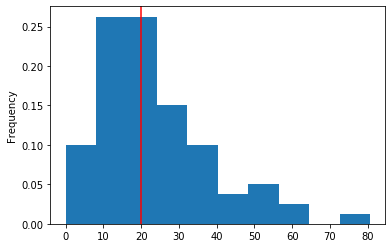

Proportion spent >=20min  0.5625
Proportion spent >=15min  0.7
Total Unique IPs  80


80

In [14]:
ga_data = ga_data.rename(columns={'IP Address': 'IPAddress_p2' #'Avg. Time on Page': 'muTimeOnPage'
                                 })
ga_data.head(4)
from datetime import *
#ga_data = ga_data.drop(columns=["Event Value", 'Avg. Value'])
ga_data['durSession'] = pd.to_timedelta(ga_data['Session Duration']).dt.total_seconds().astype(int)/60
eventsPerId = ga_data.groupby(['IPAddress_p2'], as_index=False).agg({'durSession':'mean'})
a= eventsPerId['durSession']
a.plot.hist(weights = np.ones_like(a.index) / len(a.index), bins=10)
plt.axvline(x=20, color='r', linestyle='-')
plt.show()

print("Proportion spent >=20min ", len(a[a>=20])/len(a))
print("Proportion spent >=15min ", len(a[a>=15])/len(a))
print("Total Unique IPs ",len(a))
ga_data['IPAddress_p2'].nunique()

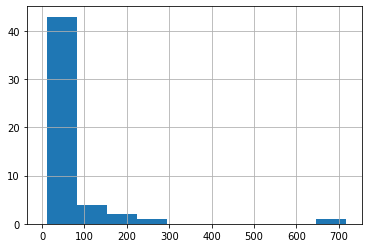

In [15]:
allD['IPAddress_p2']
df = pd.merge(allD, ga_data, on=['IPAddress_p2'])
df['durationMins_p2']
import pingouin as pg

a = df[["durSession", "durationMins_p2", "StartDate_p2", "EndDate_p2"]]
a.to_csv(pilot_file_loc +'/cleaned_data/ga_by_ip/18jan_ga_duration.csv')

pg.corr((a['durSession']/a['durationMins_p2']), a['durationMins_p2'])
a['durationMins_p2'].hist()
#plt.show()
(a['durSession']/a['durationMins_p2']).hist()

In [16]:
#name = "Analytics Pilot View Session Duration and Page Views By ID 20220111-20220118"
name = "Analytics Pilot View Events By ID 20220111-20220118.csv"
pilot_file_loc = "C:/Users/huixin/OneDrive - UC San Diego/menoplan/trial_phase/"
path = pilot_file_loc + "ga_data/" + name
#pd.read_csv(path, skiprows=5)

In [17]:
events = pd.read_csv(path, skiprows=5)
events = events.rename(columns={'IP Address': 'IPAddress_p2' #'Avg. Time on Page': 'muTimeOnPage'
                                 })
#display(events)
events['IPAddress_p2'].nunique()#75 unique IPs
events.sort_values(by=['IPAddress_p2'], ascending = False)
# #ga_data = ga_data.drop(columns=["Event Value", 'Avg. Value'])
# ga_data['durSession'] = pd.to_timedelta(ga_data['Session Duration']).dt.total_seconds().astype(int)/60
# eventsPerId = ga_data.groupby(['IPAddress_p2'], as_index=False).agg({'durSession':'mean'})
# a= eventsPerId['durSession']
df = pd.merge(allD, events, on=['IPAddress_p2'])[['Unique Events', 'Date','IPAddress_p2', 'Event Label', 'StartDate_p2', 'EndDate_p2']]
#df.to_csv(pilot_file_loc + '18jan_events_merged.csv')
#df.sort_values(by=['Unique Events'])
#ga_data = ga_data.drop(columns=["Event Value", 'Avg. Value'])

decisionFilPerId = df.groupby(['IPAddress_p2', 'Event Label'], as_index=False).agg({'Unique Events':'mean'})
decisionFilPerId = decisionFilPerId.groupby(['IPAddress_p2', 'Event Label'])['Unique Events'].agg("mean").unstack(level=1)
ls = list(decisionFilPerId.columns)
ls

decisionFilPerId = decisionFilPerId.fillna(0)
decisionFilPerId.sum().sort_values()
#decisionFilPerId

Event Label
LOW DEPRESSION SCORE                  1.0
HIGH DEPRESSION SCORE                 2.0
early-menopause-transition-result     2.0
post-menopausal-result                3.0
late-menopause-transition-result      4.0
SUB-THRESHOLD INSOMNIA                5.0
sleepdiaryv6-sleep-foundation.pdf     5.0
sex-pain-sex.png                      5.0
ok-for-breast-cancer                  5.0
reproductive-years-result             6.0
uncertain-stage-result                6.0
weekly-hot-flash-diary.pdf            6.0
sex-pain-vagina.png                   7.0
other-dryness.png                    10.0
sex-period.png                       11.0
dry-eyes2.png                        11.0
professional-help                    12.0
prescription-medicine                16.0
supplement                           17.0
sex-libido.png                       17.0
mind-body                            17.0
try-on-your-own                      18.0
other-bladder.png                    19.0
other-aches-pains.png 

In [18]:
import datetime


#name = "Analytics Pilot View Session Duration and Page Views By ID 20220111-20220118"
name = "Analytics Pilot View Page Views By ID 20220112-20220120.csv"
pilot_file_loc = "C:/Users/huixin/OneDrive - UC San Diego/menoplan/trial_phase/"
path = pilot_file_loc + "ga_data/" + name
pageviews = pd.read_csv(path, skiprows=5)
pageviews = pageviews.rename(columns={'IP Address': 'IPAddress_p2' ,'Avg. Time on Page': 'muTimeOnPage'
                                 })

pageviews['muTimeOnPage'] = pageviews['muTimeOnPage'].apply(pd.to_datetime, format='%H:%M:%S').apply(datetime.datetime.time)
pageviews['muTimeOnPage'] = pageviews['muTimeOnPage'].apply(lambda x: x.second/60 + x.minute + x.hour*60)
#display(pageviews)
pageviews['IPAddress_p2'].nunique()#75 unique IPs

totalDurPerPageById = pageviews.groupby(['IPAddress_p2', 'Page'], as_index=False).agg({'muTimeOnPage':'mean'})
totalDurPerPageById.columns = totalDurPerPageById.columns.str.strip('/?=')
totalDurPerPageById= totalDurPerPageById.rename(columns={"": "homepage"})
totalDurPerPageById = totalDurPerPageById.groupby(['IPAddress_p2', 'Page'])['muTimeOnPage'].agg("mean").unstack(level=1)
ls = list(totalDurPerPageById.columns)
r = re.compile('\d*([.,\/]?\d+)')# use regex to find dates
newlist = list(filter(r.match, ls)) # create list of dates 
totalDurPerPageById = totalDurPerPageById.drop(columns=newlist) #we do not want the dates
totalDurPerPageById=totalDurPerPageById.fillna(0)

In [19]:
insomnia_cols = [col for col in totalDurPerPageById.columns if 'test/insomnia-severity-index' in col and len(col) >28]
anxiety_cols = [col for col in totalDurPerPageById.columns if 'test/anxiety-assessment' in col and len(col) >23]
depression_cols = [col for col in totalDurPerPageById.columns if 'test/depression-assessment' in col and len(col) >26]
totalDurPerPageById['insomnia-severity-index-results'] = totalDurPerPageById[insomnia_cols].sum(axis=1)
totalDurPerPageById['anxiety-assessment-results'] = totalDurPerPageById[anxiety_cols].sum(axis=1)
totalDurPerPageById['depression-assessment-results'] = totalDurPerPageById[depression_cols].sum(axis=1)

In [20]:
totalDurPerPageById['insomnia-severity-index-results'] = totalDurPerPageById[insomnia_cols].sum(axis=1)
totalDurPerPageById['anxiety-assessment-results'] = totalDurPerPageById[anxiety_cols].sum(axis=1)
totalDurPerPageById['depression-assessment-results'] = totalDurPerPageById[depression_cols].sum(axis=1)
totalDurPerPageById = totalDurPerPageById.drop(columns=insomnia_cols)
totalDurPerPageById = totalDurPerPageById.drop(columns=anxiety_cols)
totalDurPerPageById = totalDurPerPageById.drop(columns=depression_cols)

In [21]:
totalDurPerPageById = totalDurPerPageById.fillna(0)
totalDurPerPageById
df = pd.merge(totalDurPerPageById, allD, on=['IPAddress_p2'])
b = pd.concat([df[['StartDate_p2', 'EndDate_p2']],df.iloc[:, :89]] ,join = 'outer', axis = 1)
b.to_csv(pilot_file_loc +'/cleaned_data/ga_by_ip/18jan_page_dur.csv')
totalDurPerPageById.sum().sort_values()


Page
/contact/                                               0.050000
/vaginal-physical-therapy-pelvic-physical-therapy/      0.050000
/cognitive-behavioral-therapy                           0.133333
/paced-breathing/                                       0.150000
/?s=Help+for+hot+flashes                                0.166667
                                                         ...    
/questions-and-answers/                                75.200000
/hot-flashes/                                          83.866667
/create-my-menoplan/                                  159.350000
/                                                     171.916667
/womens-stories/                                      198.400000
Length: 88, dtype: float64

In [25]:
pd.DataFrame((totalDurPerPageById).sum()/len(totalDurPerPageById)).sort_values(by=[0]).to_csv("meanDurEachPage.csv")

SyntaxError: invalid syntax (<ipython-input-25-1dd6127d975b>, line 1)